<a href="https://colab.research.google.com/github/bridg3r/myclasses/blob/main/Copy_of_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Note: After you run this cell, the training and test data will be available in
# the file browser. (Click the folder icon on the left to view it)
#
# If you don't see the data after the cell completes, click the refresh button
# in the file browser (folder icon with circular arrow)

# First, let's download and unzip the data
!echo "Downloading files..."
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training1.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training2.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_partial.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_classes_partial.csv

!echo "Unzipping files..."
!unzip -q /content/training1.zip
!unzip -q /content/training2.zip
!unzip -q /content/test.zip
!unzip -q /content/test_partial.zip

# Combine the two traning directories
!echo "Merging training data..."
!mkdir /content/training
!mv /content/training1/* /content/training
!mv /content/training2/* /content/training

# Cleanup
!echo "Cleaning up..."
!rmdir /content/training1
!rmdir /content/training2
!rm training1.zip
!rm training2.zip
!rm test.zip
!rm test_partial.zip

!echo "Data ready."

Unzipping files...
Merging training data...
Cleaning up...
Data ready.


In [ ]:
training_dir = '/content/training/'
image_size = (100, 100)

# Split up the training data images into training and validations sets
# We'll use and ImageDataGenerator to do the splits
# ImageDataGenerator can also be used to do preprocessing and agumentation on the files as can be seen with rescale

#data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[.2, .8],
    rescale=1./255,
    validation_split=0.2,
    fill_mode='nearest'
)

#training data
train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size = image_size,
        subset="training",
        batch_size=32,
        class_mode='sparse',
        seed=42,shuffle=True)

#validation data
validation_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=image_size,
        batch_size=32,
        class_mode='sparse',
        subset="validation",
        seed=42)


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


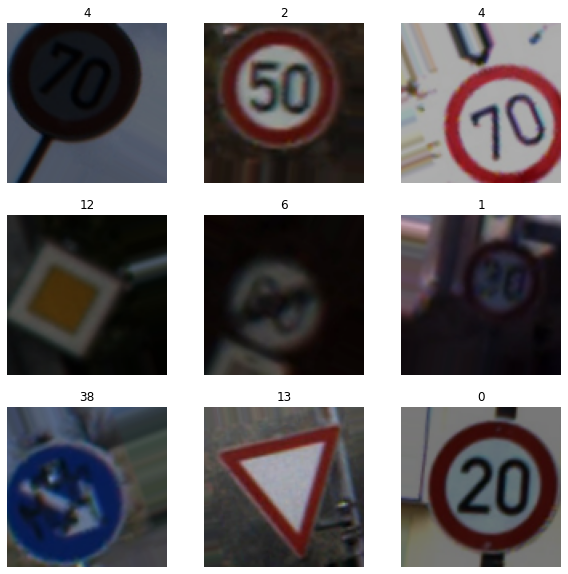

In [ ]:
# See if the data was augmnented properly
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        first_image = images.tolist()[i]      
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

In [ ]:
model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=True,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    restore_best_weights=True,
    min_delta = .0005,
    mode = "max"
    )

In [ ]:
history = model.fit(train_generator, epochs=50, 
                    validation_data=(validation_generator), callbacks = [callback])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


981/981 [==============================] - 174s 158ms/step - loss: 0.7489 - accuracy: 0.8016 - val_loss: 0.2466 - val_accuracy: 0.9328
Epoch 2/50
981/981 [==============================] - 150s 153ms/step - loss: 0.1900 - accuracy: 0.9496 - val_loss: 0.3112 - val_accuracy: 0.9096
Epoch 3/50
981/981 [==============================] - 150s 153ms/step - loss: 0.1143 - accuracy: 0.9704 - val_loss: 0.1242 - val_accuracy: 0.9662
Epoch 4/50
981/981 [==============================] - 151s 153ms/step - loss: 0.0856 - accuracy: 0.9777 - val_loss: 0.3628 - val_accuracy: 0.9250
Epoch 5/50
981/981 [==============================] - 149s 151ms/step - loss: 0.0913 - accuracy: 0.9774 - val_loss: 3.1529 - val_accuracy: 0.6953
Epoch 6/50
981/981 [==============================] - 149s 151ms/step - loss: 0.0811 - accuracy: 0.9792 - val_loss: 0.1013 - val_accuracy: 0.9764
Epoch 7/50
981/981 [==============================] - 149s 151ms/step - loss: 0.0907 - accuracy: 0.9758 - val_loss: 0.2288 - val_accura

In [ ]:
import matplotlib.pyplot as plt

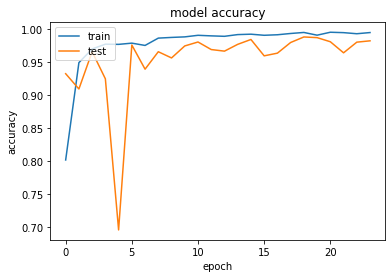

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Testing the model with partial holdout set

from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]

Found 201 images belonging to 1 classes.


In [ ]:
ground_truth = pd.read_csv('test_classes_partial.csv')
accuracy_score(ground_truth.ClassId, predictions)

0.9900497512437811

In [ ]:
# submit final holdout predictions

from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]

Found 12630 images belonging to 1 classes.


In [ ]:
pd.DataFrame(predictions).to_csv("holdout_predictions.csv")

In [ ]:
# save for AI team to convert to Apple's fromat

model.save("./drive/My Drive/holdout99")

INFO:tensorflow:Assets written to: ./drive/My Drive/holdout99/assets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model2 = keras.models.load_model('/content/assets/cnn99.pb')

OSError: ignored

In [ ]:
# Testing the saved model with partial holdout set

from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities2 = model2.predict(test_generator)
# probabilities = tf.keras.applications.inception_v3.decode_predictions(probabilities)
predictions2 = [np.argmax(probas) for probas in probabilities2]

Found 201 images belonging to 1 classes.


In [ ]:
ground_truth = pd.read_csv('test_classes_partial.csv')
accuracy_score(ground_truth.ClassId, predictions2)

0.9800995024875622

Questions: 



1.   Obviously you'll be using a convolutional neural network to build your model, but will you be using an existing architecture as a starting point, or do you think it'll be better to design your own?<br> <br> We chose to use InceptionV3

2.   The training and test images have three color channels, (Red, Green, and Blue), with pixel values for each channel ranging from 0 to 255. Do you think we need to do any preprocessing before using the data to train the model? 
<br> <br> We used tf.keras.applications.resnet50.preprocess_input() as well as did some image augmentation with the ImageDataGenerator

3. I'm concerned that the model will only be able to recognize signs that look exactly like the ones we have images for. I understand from Johnny that data augmentation can help with this problem. What strategy would you suggest?
<br> <br> We did some normalization to the pixels, whitening, change in brightness, shifting, flipping, and rescaling (zooming).

4. This seems like one of those cases where straight accuracy might not be the best metric for model evaluation, but what do you think?

5. We'd like you to actually ride in the car for a test drive, based on automation built on your sign recognition model. What performance would you require before you’d ride in the car?

<br> *calculate the average human accident rate in germany


Custom Model: <br>
epoch 10, no data augmentation: training: 99%ish, test: 90% <br>
epoch 10, with data augmentation: training: 63.45%, test : 54.7%
<br>
InceptionV3:
epcoh 1, with data augmentation: training: .4518, test: .045% (i think this is because of a coding error)
epoch 1, with simpler data aug,: training: 0.5739, test: 0.7164179104477612
epoch 23, with simpler data aug: trainging: 0.9656 test: 0.9203980099502488
epoch 21 looks like the best
epoch
epoch 3, with even simpler data aug: training: 0.9570 test: 0.9601990049751243
epoch 16 (21), with same data aug as previous: training: 0.9941, test: 0.9800995024875622

Summary so far:  <br>

The inception model trains itself better with the augmented data. The problem as of now, is that the augmented data doesn't match the training data very well with the inception model. It seems though that the custom model performed close to how the training data on the testing data. 





In [ ]:
#This cell attempts to train the model using the imagenet weights. 
# I am getting issues with what I think is changing the dimensions of the input layer

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 43 classes
predictions = Dense(43, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(train_generator, epochs=10, validation_data=(validation_generator))

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(train_generator, epochs=10, validation_data=(validation_generator))